In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape


(50000, 1)

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
y_test = y_test.reshape(-1,)

In [8]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


In [9]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

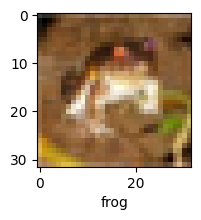

In [10]:
plot_sample(X_train, y_train, 0)

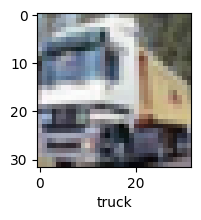

In [11]:
plot_sample(X_train, y_train, 1)

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 39ms/step - accuracy: 0.3788 - loss: 1.6983
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.5906 - loss: 1.1618
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6493 - loss: 1.0014
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.6812 - loss: 0.9260
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.7002 - loss: 0.8538
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 40ms/step - accuracy: 0.7249 - loss: 0.7889
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 41ms/step - accuracy: 0.7468 - loss: 0.7320
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 39ms/step - accuracy: 0.7624 - loss: 0.6803
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.7745 - loss: 0.6468
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.7902 - loss: 0.6026


In [16]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6705 - loss: 1.0348


[1.0323081016540527, 0.6686999797821045]

In [17]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


array([[8.1677930e-03, 2.0258046e-04, 2.8494239e-02, 6.2411469e-01,
        1.0624018e-02, 3.1304315e-01, 5.3314544e-04, 1.8300276e-04,
        1.4543801e-02, 9.3583811e-05],
       [1.9080561e-03, 4.2974850e-04, 3.5272322e-07, 5.0423335e-08,
        1.3821726e-08, 2.6483027e-09, 1.7516862e-10, 4.7386883e-11,
        9.9710011e-01, 5.6174106e-04],
       [8.6083807e-02, 5.0605904e-02, 1.4057687e-04, 3.5129241e-03,
        1.7846635e-03, 3.3174054e-04, 6.5413355e-05, 1.0848658e-03,
        8.4677422e-01, 9.6159251e-03],
       [8.3576328e-01, 6.8451515e-03, 3.3354308e-03, 4.7804364e-03,
        5.9645572e-03, 1.6070537e-04, 1.0405338e-04, 1.9534084e-04,
        1.4232002e-01, 5.3104613e-04],
       [7.6300074e-07, 6.8526347e-06, 1.4189866e-02, 1.3925233e-01,
        4.4545832e-01, 1.1468098e-02, 3.8957229e-01, 3.9328541e-05,
        1.1918825e-05, 3.3200294e-07]], dtype=float32)

In [18]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[np.int64(3), np.int64(8), np.int64(8), np.int64(0), np.int64(4)]

In [19]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

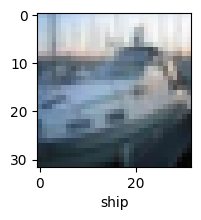

In [27]:
plot_sample(X_test, y_test,2)


In [28]:
classes[y_classes[2]]


'ship'